<a href="https://colab.research.google.com/github/ivernile/SnowAndGlacierClasses/blob/main/Fully_connected_Deep_autoencoders_for_classification_of_snow_and_glacier_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our aim is to build classification technique using **AutoEncoder**.

**Algorithm:** The algorithms is preety simple.
* We create an AutoEncoder for each class.
* Measure the loss for test data for each model.
* Model with the lowest loss provides the class.


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import warnings
warnings.simplefilter('ignore')

In [ ]:
print(tf.__version__)


2.14.0


### Reading Dataset

In [ ]:
labels = pd.read_csv('/content/_labels1.csv')
data = pd.read_csv('/content/data.csv')

### Acquaintance with data

In [ ]:
data

,Unnamed: 0,ID,X,Y,B1,B2,B3,B4,B5,B6,...,B133,B134,B135,B136,B137,B138,B139,B140,B141,B142
0,0,1,133,487,0.663300,0.664000,0.673200,0.666900,0.664200,0.647000,...,0.044400,0.037700,0.038400,0.033700,0.034900,0.034400,0.015200,0.008300,0.013500,0.015400
1,1,2,133,488,0.686200,0.680000,0.697000,0.688900,0.684000,0.667500,...,0.043200,0.038300,0.041600,0.038400,0.023200,0.020900,0.017200,0.011100,0.006600,0.007200
2,2,3,132,488,0.640200,0.649600,0.653300,0.647700,0.645100,0.631600,...,0.040800,0.034600,0.037200,0.035000,0.022500,0.018800,0.017900,0.017600,0.010400,-0.000300
3,3,4,122,489,0.662300,0.663400,0.686500,0.669100,0.662800,0.658100,...,0.058300,0.051500,0.056000,0.052300,0.050600,0.053500,0.040200,0.034800,0.043500,0.053000
4,4,5,123,489,0.647600,0.656300,0.672000,0.665000,0.662100,0.647100,...,0.048000,0.044300,0.047800,0.049000,0.046700,0.043600,0.040900,0.031200,0.048100,0.037200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,535,536,210,1782,0.409396,0.423440,0.300567,0.236190,0.313093,0.323864,...,0.268437,0.048649,0.000000,0.000000,0.003521,0.000000,0.687075,0.286096,0.206030,0.181102
5413,536,537,209,1782,0.454698,0.451796,0.277883,0.287619,0.402277,0.287879,...,0.648968,0.672973,0.748120,0.868852,0.584507,0.412256,0.513605,0.427807,0.618090,0.452756
5414,537,538,212,1782,0.332215,0.043478,0.230624,0.131429,0.170778,0.261364,...,0.000000,0.002703,0.319549,0.298361,0.447183,0.470752,0.275510,0.401070,0.618090,0.226378
5415,538,539,211,1782,0.236577,0.285444,0.206049,0.291429,0.273245,0.308712,...,0.000000,0.002703,0.000000,0.000000,0.003521,0.000000,0.860544,0.828877,0.057789,0.001969


We have a total of 142 as feature to classify a total of 6 types of snow and glacier features e.g.  The classes are denoted in **labels**.

In [ ]:
labels

,id,class
0,0,cSnow
1,1,cSnow
2,2,cSnow
3,3,cSnow
4,4,cSnow
...,...,...
5412,535,WaterB
5413,536,WaterB
5414,537,WaterB
5415,538,WaterB


### Data Cleaning

Before diving into AutoEncoders, we perform some data cleaning.

**Unnamed: 0** column is not a feature or any sort of data. So, dropping it.

In [ ]:
# drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'ID', 'X', 'Y'])
labels = labels.drop(columns=['id'])

In [ ]:
print(data.shape)
print(labels.shape)

(5417, 142)
(5417, 1)


In [ ]:
labels.value_counts()

"""0        1436
3        1243
5        1133
1         590
2         540
4         475"""

'0        1436\n3        1243\n5        1133\n1         590\n2         540\n4         475'

There are 6 classes. Though it's not a balanced dataset, we don't care much as we are to classify these building AutoEncoders.

Lets examine the **data** if there is any null or some sort of value that is not so helpful.

In [ ]:
data.isnull().values.any()

False

So, there is no null value.

Now, check if there is any value that is equal or zero to all, which means that feature will not have any influence to any of the classes.

In [ ]:
(data.min() == data.max()).value_counts()

False    142
dtype: int64

In [ ]:
#(data.max() == 0.0).value_counts()

Our proposition is Correct! Getting rid of those features.

In [ ]:
#data = data.loc[:, (data.max() != data.min())]
data.shape

(5417, 142)

In [ ]:
#merging the labels with the data
#dataa['class'] = labels['class']

In [ ]:
#print(dataa.shape)


In [ ]:
#dataa

### Spliting the Dataset

In [ ]:
df, df_test = train_test_split(data, test_size=0.25, random_state=21)
test_index = list(df_test.index)
df_test = df_test.values


Prepating the data for our model.

In [ ]:
cSnow_mask = labels['class'] == 'cSnow'
#print(cSnow_mask)

dGlaIce_mask = labels['class'] == 'dGlaIce'
firn_mask = labels['class'] == 'firn'
GlaIce_mask = labels['class'] == 'GlaIce'
ImDebris_mask = labels['class'] == 'ImDebris'
WaterB_mask = labels['class'] == 'WaterB'


df_cSnow = df[cSnow_mask]
#print(df_cSnow)
df_dGlaIce = df[dGlaIce_mask]
#print(df_dGlaIce)
df_firn = df[firn_mask]
#print(df_firn)

df_GlaIce = df[GlaIce_mask]
#print(df_GlaIce)

df_ImDebris = df[ImDebris_mask]
#print(df_ImDebris)

df_WaterB = df[WaterB_mask]
#print(df_WaterB)

x_cSnow = df_cSnow.values

x_dGlaIce = df_dGlaIce.values
x_firn = df_firn.values
x_GlaIce = df_GlaIce.values
x_ImDebris = df_ImDebris.values
x_WaterB = df_WaterB.values


### Creating the Model

Now we create our Fully-connected Deep AutoEncoder (FcDAE). In short-hand notation, the model looks like this:


In [ ]:
from keras.layers import Dropout
def Model():
    model = Sequential()
    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))
    model.add(Dense(21, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(x_cSnow.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
"""

def Model():
    model = Sequential()
    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(x_cSnow.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def Model():
    model = Sequential()
    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(x_cSnow.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model '''

'''def Model():
    model = Sequential()
    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))
    model.add(Dense(21, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(x_cSnow.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def Model():
    model = Sequential()
    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))
    model.add(Dense(21, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(x_cSnow.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model'''
# code for denoising auto encoders
'''def Model():
    model = Sequential()
    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(21, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(x_cSnow.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model """

"\n\ndef Model():\n    model = Sequential()\n    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))\n    model.add(Dense(50, activation='relu'))\n    model.add(Dense(25, activation='relu'))\n    model.add(Dense(50, activation='relu'))\n    model.add(Dense(100, activation='relu'))\n    model.add(Dense(x_cSnow.shape[1]))\n    model.compile(loss='mean_squared_error', optimizer='adam')\n    return model\n\ndef Model():\n    model = Sequential()\n    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))\n    model.add(Dense(30, activation='relu'))\n    model.add(Dense(100, activation='relu'))\n    model.add(Dense(x_cSnow.shape[1]))\n    model.compile(loss='mean_squared_error', optimizer='adam')\n    return model '''\n\n'''def Model():\n    model = Sequential()\n    model.add(Dense(100, input_dim=x_cSnow.shape[1], activation='relu'))\n    model.add(Dense(21, activation='relu'))\n    model.add(Dense(100, activation='relu'))\n    model.add(Dense(x_cSnow.shape[1

Early stopping callback.

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss',
                               min_delta = 0,
                               patience = 5,
                               verbose = 1,
                               restore_best_weights = True)

Evaluation function for all models using mean squared error.

In [ ]:
def evaluate(model):
    return (np.sqrt(metrics.mean_squared_error(model.predict(x_cSnow), x_cSnow)),
            np.sqrt(metrics.mean_squared_error(model.predict(x_dGlaIce), x_dGlaIce)),
            np.sqrt(metrics.mean_squared_error(model.predict(x_firn), x_firn)),
            np.sqrt(metrics.mean_squared_error(model.predict(x_GlaIce), x_GlaIce)),
            np.sqrt(metrics.mean_squared_error(model.predict(x_ImDebris), x_ImDebris)),
            np.sqrt(metrics.mean_squared_error(model.predict(x_WaterB), x_WaterB)))

Now we create five FcDAE, one for each class and train them. Notice that, for every FcDAE, the corresponding class gets the lowest loss.

In [ ]:
x_cSnow_train, x_cSnow_test = train_test_split(x_cSnow, test_size=0.2, random_state=42)

cSnow_model = Model()
history=cSnow_model.fit(x_cSnow_train, x_cSnow_train, validation_data=(x_cSnow_test, x_cSnow_test), verbose=1, epochs=100, callbacks=[early_stopping])
evaluate(cSnow_model)

Epoch 1/100
24/24 [==============================] - 7s 11ms/step - loss: 0.1035 - val_loss: 0.0216
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 4.1681e-04 - val_loss: 1.6415e-04
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 1.1015e-04 - val_loss: 7.6091e-05
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 8.1686e-05 - val_loss: 6.8647e-05
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 7.7186e-05 - val_loss: 6.7153e-05
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 7.7103e-05 - val_loss: 6.6504e-05
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 7.5315e-05 - val_loss: 6.7581e-05
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 7.5034e-05 - val_loss: 6.5058e-05
Epoch 10/100
24/24 [==============================] 

(0.007865857610108542,
 0.33496186205132267,
 0.015778000832980064,
 0.02668153803441849,
 0.45836418522957867,
 0.2580036632341565)

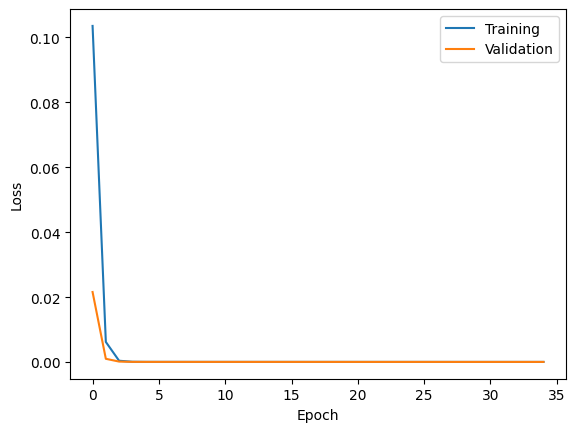

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation losses
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
i=0
# save the figure to a file
plt.savefig(f'model_{i+1}_curves.png')

plt.show()

In [ ]:
x_dGlaIce_train, x_dGlaIce_test = train_test_split(x_dGlaIce, test_size=0.2, random_state=42)

dGlaIce_model = Model()
history=dGlaIce_model.fit(x_dGlaIce_train, x_dGlaIce_train, validation_data=(x_dGlaIce_test, x_dGlaIce_test), verbose=1, epochs=3000, callbacks=[early_stopping])
evaluate(dGlaIce_model)

Epoch 1/3000
9/9 [==============================] - 2s 32ms/step - loss: 0.2497 - val_loss: 0.1766
Epoch 2/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.1345 - val_loss: 0.0728
Epoch 3/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0522 - val_loss: 0.0280
Epoch 4/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0222 - val_loss: 0.0152
Epoch 5/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0143 - val_loss: 0.0113
Epoch 6/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0113 - val_loss: 0.0093
Epoch 7/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 8/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0080 - val_loss: 0.0066
Epoch 9/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.0064 - val_loss: 0.0051
Epoch 10/3000
9/9 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 11/

(0.07966246795767179,
 0.03848994478683624,
 0.07207894592146927,
 0.06095312829052805,
 0.11458228032664916,
 0.17772259324170492)

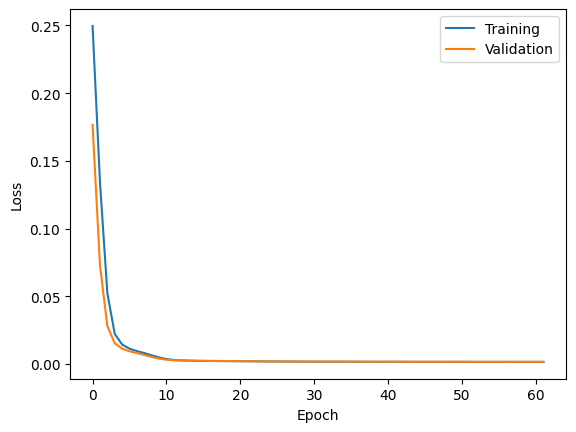

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation losses
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# save the figure to a file
plt.savefig(f'model_{i+1}_curves.png')

plt.show()

In [ ]:
x_firn_train, x_firn_test = train_test_split(x_firn, test_size=0.2, random_state=42)

firn_model = Model()
history=firn_model.fit(x_firn_train, x_firn_train, validation_data=(x_firn_test, x_firn_test), verbose=1, epochs=3000, callbacks=[early_stopping])
evaluate(firn_model)

Epoch 1/3000
21/21 [==============================] - 1s 15ms/step - loss: 0.0739 - val_loss: 0.0225
Epoch 2/3000
21/21 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0012
Epoch 3/3000
21/21 [==============================] - 0s 7ms/step - loss: 5.4025e-04 - val_loss: 2.1471e-04
Epoch 4/3000
21/21 [==============================] - 0s 7ms/step - loss: 1.3936e-04 - val_loss: 1.0349e-04
Epoch 5/3000
21/21 [==============================] - 0s 9ms/step - loss: 9.1110e-05 - val_loss: 8.1772e-05
Epoch 6/3000
21/21 [==============================] - 0s 7ms/step - loss: 8.2912e-05 - val_loss: 7.8705e-05
Epoch 7/3000
21/21 [==============================] - 0s 7ms/step - loss: 7.5460e-05 - val_loss: 7.1613e-05
Epoch 8/3000
21/21 [==============================] - 0s 7ms/step - loss: 7.1699e-05 - val_loss: 6.7486e-05
Epoch 9/3000
21/21 [==============================] - 0s 7ms/step - loss: 6.9524e-05 - val_loss: 6.3862e-05
Epoch 10/3000
21/21 [======================

(0.017603864273957333,
 0.34470327421245595,
 0.006783946430364118,
 0.016347598164929707,
 0.4698456326610964,
 0.2587761097091196)

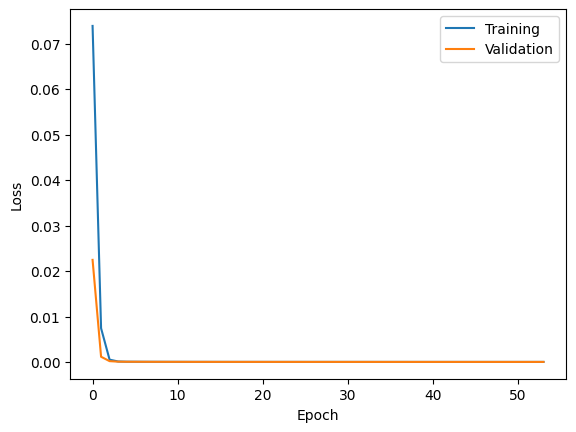

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation losses
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# save the figure to a file
plt.savefig(f'model_{i+1}_curves.png')

plt.show()

In [ ]:
x_GlaIce_train, x_GlaIce_test = train_test_split(x_GlaIce, test_size=0.2, random_state=42)

GlaIce_model = Model()
history=GlaIce_model.fit(x_GlaIce_train, x_GlaIce_train, validation_data=(x_GlaIce_test, x_GlaIce_test), verbose=1, epochs=3000, callbacks=[early_stopping])
evaluate(GlaIce_model)

Epoch 1/3000
27/27 [==============================] - 1s 10ms/step - loss: 0.0287 - val_loss: 0.0040
Epoch 2/3000
27/27 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 2.4588e-04
Epoch 3/3000
27/27 [==============================] - 0s 6ms/step - loss: 1.5792e-04 - val_loss: 1.0712e-04
Epoch 4/3000
27/27 [==============================] - 0s 6ms/step - loss: 9.7687e-05 - val_loss: 9.0269e-05
Epoch 5/3000
27/27 [==============================] - 0s 6ms/step - loss: 8.8281e-05 - val_loss: 8.3079e-05
Epoch 6/3000
27/27 [==============================] - 0s 7ms/step - loss: 8.2073e-05 - val_loss: 7.8187e-05
Epoch 7/3000
27/27 [==============================] - 0s 6ms/step - loss: 7.8047e-05 - val_loss: 7.3963e-05
Epoch 8/3000
27/27 [==============================] - 0s 6ms/step - loss: 7.5358e-05 - val_loss: 7.0939e-05
Epoch 9/3000
27/27 [==============================] - 0s 7ms/step - loss: 7.2563e-05 - val_loss: 6.8190e-05
Epoch 10/3000
27/27 [==================

(0.02064609093424001,
 0.33310397379022216,
 0.00904796152357419,
 0.005511924756668247,
 0.45387584324886554,
 0.25595526471756336)

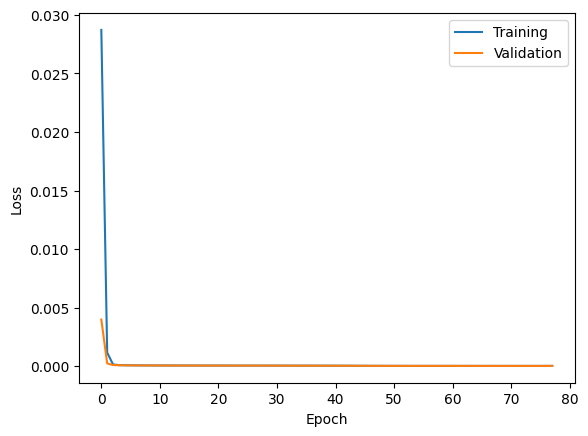

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation losses
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# save the figure to a file
plt.savefig(f'model_{i+1}_curves.png')

plt.show()

In [ ]:
x_ImDebris_train, x_ImDebris_test = train_test_split(x_ImDebris, test_size=0.2, random_state=42)

ImDebris_model = Model()
history=ImDebris_model.fit(x_ImDebris_train, x_ImDebris_train, validation_data=(x_ImDebris_test, x_ImDebris_test), verbose=1, epochs=3000, callbacks=[early_stopping])
evaluate(ImDebris_model)

Epoch 1/3000
11/11 [==============================] - 2s 26ms/step - loss: 0.3129 - val_loss: 0.1758
Epoch 2/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.0971 - val_loss: 0.0399
Epoch 3/3000
11/11 [==============================] - 0s 10ms/step - loss: 0.0256 - val_loss: 0.0177
Epoch 4/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.0159 - val_loss: 0.0137
Epoch 5/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.0132 - val_loss: 0.0116
Epoch 6/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 7/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.0084 - val_loss: 0.0067
Epoch 8/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 9/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 10/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.00

(0.09739847407246667,
 0.07530035014640117,
 0.08258022802268167,
 0.06425242983513525,
 0.025082342728482535,
 0.17802986404751847)

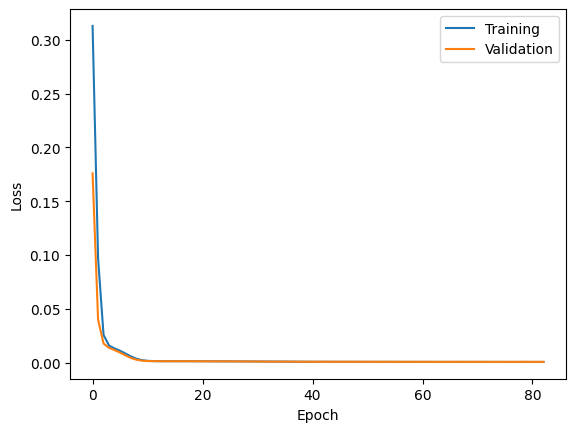

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation losses
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# save the figure to a file
plt.savefig(f'model_{i+1}_curves.png')

plt.show()

In [ ]:
x_WaterB_train, x_WaterB_test = train_test_split(x_WaterB, test_size=0.2, random_state=42)

WaterB_model = Model()
history=WaterB_model.fit(x_WaterB_train, x_WaterB_train, validation_data=(x_WaterB_test, x_WaterB_test), verbose=1, epochs=3000, callbacks=[early_stopping])
evaluate(WaterB_model)

Epoch 1/3000
11/11 [==============================] - 1s 17ms/step - loss: 0.0990 - val_loss: 0.0677
Epoch 2/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.0517 - val_loss: 0.0341
Epoch 3/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.0306 - val_loss: 0.0274
Epoch 4/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.0263
Epoch 5/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0258
Epoch 6/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.0256 - val_loss: 0.0254
Epoch 7/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.0253
Epoch 8/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.0250
Epoch 9/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.0246
Epoch 10/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.0243 - val_loss: 0.024

(0.11036006932868957,
 0.14348175458803814,
 0.10109293217338294,
 0.09225196885600388,
 0.20199217213369333,
 0.11461806176476881)

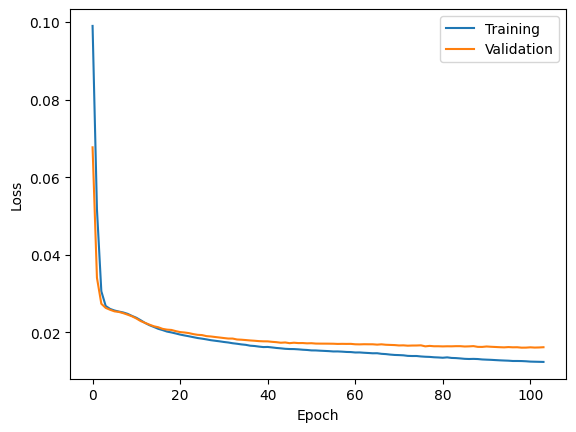

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation losses
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# save the figure to a file
plt.savefig(f'model_{i+1}_curves.png')

plt.show()

List of models:

In [ ]:
models = [cSnow_model, dGlaIce_model, firn_model, GlaIce_model, ImDebris_model, WaterB_model]

Function that provides the prediction for the test data. This may take some time as it examins the loss for all classes and predicts the class with respect to lowest loss.

In [ ]:
def get_pred(df_test, models):
    pred_class = []
    for i in range(len(df_test)):
        loss = []
        x = df_test[i].reshape(1, -1)
        for model in models:
            loss.append(np.sqrt(metrics.mean_squared_error(model.predict(x), x)))
        pred_class.append(loss.index(min(loss)))
    return pred_class

In [ ]:
def get_label(test_index):
    num_label = []
    for l in range(len(test_index)):
        _ = labels.values[test_index[l]][0][0]
        if _ == 'c': num_label.append(0)
        elif _ == 'd': num_label.append(1)
        elif _ == 'f': num_label.append(2)
        elif _ == 'G': num_label.append(3)
        elif _ == 'I': num_label.append(4)
        elif _ == 'W': num_label.append(5)
    return num_label

Getting the prediction score, Accuracy:

In [ ]:
pred_correct = 0
num_label = get_label(test_index)
pred_class = get_pred(df_test, models)

for i in range(len(num_label)):
    if num_label[i] == pred_class[i]: pred_correct += 1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step


In [ ]:
def confusion_matrix(y_true, y_pred):
    cm = np.zeros((6,6))
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            cm[y_true[i], y_pred[i]] += 1
        else:

            cm[y_true[i], y_pred[i]] += 1
    return cm

# Code to calculate accuracy
def accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return (cm[0, 0] + cm[1, 1] + cm[2, 2] + cm[3, 3] + cm[4, 4] + cm[5, 5]) / np.sum(cm)

# Calculate confusion matrix
cm = confusion_matrix(num_label, pred_class)


print("Confusion Matrix: \n", cm)

# Calculate accuracy
acc = accuracy(num_label, pred_class)
print("Accuracy: ", acc)

Confusion Matrix: 
 [[293.   0.   1.   0.   0.   0.]
 [  0. 124.   0.   0.   0.   0.]
 [  0.   0. 264.  32.   0.   0.]
 [  0.   0.   2. 357.   0.   0.]
 [  0.   0.   0.   0. 150.   0.]
 [  0.   0.   0.   0.   0. 132.]]
Accuracy:  0.974169741697417


In [ ]:
print('Accuracy:', pred_correct/len(num_label) * 100)

The mean squared error (MSE) is a single value that represents the average squared difference between the predicted values and the actual values (labels) for a given set of samples. In your code, MSE is computed for each individual model's prediction for a specific sample.

Let's break down the process:

For a single test sample:

The test sample x is first reshaped to fit the input shape expected by the model: x = df_test[i].reshape(1, -1). After reshaping, x is a 2D array with dimensions (1, number_of_features).
The model predicts the output based on this reshaped x using model.predict(x). This prediction is also a 2D array with dimensions (1, number_of_output_neurons) if the model predicts a single output value, or (1, number_of_output_neurons) if the model predicts multiple values.
The mean squared error (MSE) is calculated between the predicted values and the actual test sample: metrics.mean_squared_error(model.predict(x), x). This calculation results in a single MSE value.
For all test samples:

The above process is repeated for each test sample in the loop.
For each test sample, a single MSE value is computed.
So, the MSE values you have in the loss list for a particular sample are the MSE between the predicted values and the actual values for that specific sample, computed by each model individually.

In your function, loss is a list that contains MSE values for each model's prediction of the same test sample. When you use loss.index(min(loss)), it finds the index of the model in the ensemble that had the smallest MSE for that particular sample. This index represents which model is the best fit for predicting that specific sample.

**Reference:**

[1] P. García-Díaz, I. Sánchez-Berriel, J.A. Martínez-Rojas, et al., Unsupervised feature selection algorithm for multiclass cancer classification of gene expression RNA-Seq data, Genomics (2018), https://doi.org/10.1016/j.ygeno.2019.11.004
